In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [62]:
df = pd.read_csv('ProgressSpread.csv')

In [63]:
df.head()

,Date,Week,Goal #,Goal,Status
0,2020-01-27,1,1,Format the new Raspberry Pi and install necess...,Completed
1,2020-01-27,1,2,Build simple TkInter GUI for testing Purposes,In Progress
2,2020-01-27,1,3,Integrate GUI with Raspberry Pi and touchscreen,Completed
3,2020-01-27,1,4,Test BME sensors on the Raspberry Pi,In Progress
4,2020-02-03,2,2,Build simple TkInter GUI for testing Purposes,Completed


In [64]:
df.Status.unique()

array(['Completed', 'In Progress', 'Abandoned'], dtype=object)

In [65]:
df = pd.concat([df, pd.get_dummies(df['Status'])], axis=1)
df.head()

,Date,Week,Goal #,Goal,Status,Abandoned,Completed,In Progress
0,2020-01-27,1,1,Format the new Raspberry Pi and install necess...,Completed,0,1,0
1,2020-01-27,1,2,Build simple TkInter GUI for testing Purposes,In Progress,0,0,1
2,2020-01-27,1,3,Integrate GUI with Raspberry Pi and touchscreen,Completed,0,1,0
3,2020-01-27,1,4,Test BME sensors on the Raspberry Pi,In Progress,0,0,1
4,2020-02-03,2,2,Build simple TkInter GUI for testing Purposes,Completed,0,1,0


In [66]:
df[df.Status == 'Completed']

,Date,Week,Goal #,Goal,Status,Abandoned,Completed,In Progress
0,2020-01-27,1,1,Format the new Raspberry Pi and install necess...,Completed,0,1,0
2,2020-01-27,1,3,Integrate GUI with Raspberry Pi and touchscreen,Completed,0,1,0
4,2020-02-03,2,2,Build simple TkInter GUI for testing Purposes,Completed,0,1,0
6,2020-02-03,2,5,Establish UWS Wi-Fi connection with the raspbe...,Completed,0,1,0
9,2020-02-10,3,4,Test BME sensors on the Raspberry Pi,Completed,0,1,0
11,2020-02-10,3,7,Begin GUI backend construction (passing input ...,Completed,0,1,0
14,2020-02-10,3,10,Log input data to csv or txt file,Completed,0,1,0
18,2020-02-23,4,12,Use Dr. Barlage’s current source and new adapt...,Completed,0,1,0
20,2020-02-23,4,14,Compile Task Data for Progress Report,Completed,0,1,0
21,2020-02-23,4,15,Run simulations to test GUI abnormalities and ...,Completed,0,1,0


In [67]:
progressStack = df.groupby(['Week', 'Status']).count()
completion_stack = df[df.Status == 'Completed']
df['CompletedTotal'] = np.cumsum(df.Completed)
# df['Total'] = np.cumsum()
# df['CompletedTotal'] = np.cumsum(df.Completed)


[Text(0,0.5,'Task Count'),
 Text(0.5,0,'Weekly Report #'),
 Text(0.5,1,'Project Progression per Weekly Report')]

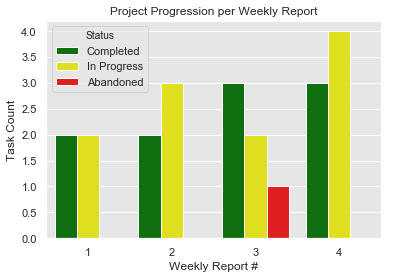

In [68]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
colours = ['green', 'yellow', 'red']
ax = sns.countplot(x = 'Week', hue = 'Status', data = df, palette = colours)
ax.set(xlabel = 'Weekly Report #', ylabel = 'Task Count', title = 'Project Progression per Weekly Report')


In [69]:
completionCount = df.groupby('Date').max()
completionCount

,Week,Goal #,Goal,Status,Abandoned,Completed,In Progress,CompletedTotal
Date,,,,,,,,
2020-01-27,1,4,Test BME sensors on the Raspberry Pi,In Progress,0,1,1,2
2020-02-03,2,7,Test the Electrometer Code with Octave (Get th...,In Progress,0,1,1,4
2020-02-10,3,10,Test the Electrometer Code with Octave (Get th...,In Progress,1,1,1,7
2020-02-23,4,15,Use Dr. Barlage’s current source and new adapt...,In Progress,0,1,1,10


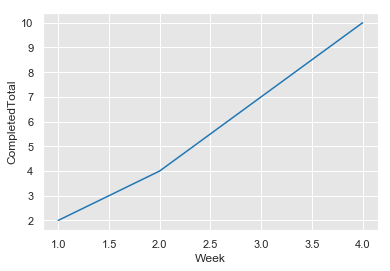

In [70]:
sns.lineplot(x = 'Week', y = 'CompletedTotal', data = completionCount, palette = colours)

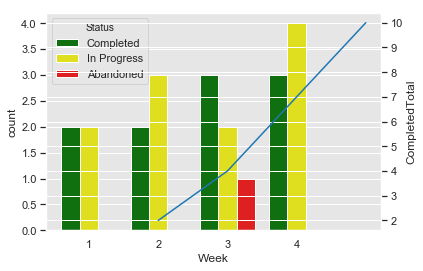

In [71]:
    fig, ax = plt.pyplot.subplots()
#     sns.regplot(x='round', y='money', data=firm, ax=ax)
    sns.countplot(x = 'Week', hue = 'Status', data = df, palette = colours, ax = ax)
    ax2 = ax.twinx()
#     ax2.set(ylim(1,10))
#     sns.regplot(x='round', y='dead', data=firm, ax=ax2, color='r')
    sns.lineplot(x = 'Week', y = 'CompletedTotal', data = completionCount, palette = colours, 
                 ax = ax2, markers = True)
#     sns.plt.ylim(0,10)
#     sns.plt.show()

TypeError: inner() got multiple values for keyword argument 'ax'

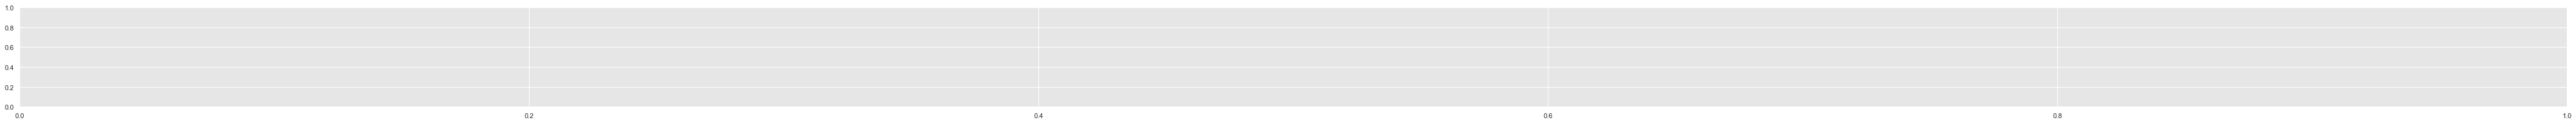

In [72]:
fig, ax = plt.pyplot.subplots(figsize=(75,3))
ax.bar(x = 'Week', hue = 'Status', data = df, palette = colours, ax = ax)
ax2 = ax.twinx()
ax2.ylim(1,10)
ax2.plot('Week', 'CompletedTotal', data=df, color='teal')

In [ ]:
ax = sns.barplot(x="Week", y="Goal", hue="Status", data=progressStack)